In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import sympy as sym
from sympy import var, exp, solve, lambdify, diff, sqrt, log
from scipy.optimize import root
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

### Exercise 1. 

For the Brock and Mirman model in use Uhlig’s notation to analytically find the values of the following matrices: F,G,H,L,M & N as functions of the parameters. Given these find the values of P & Q, also as functions of the parameters. Imposing our calibrated parameter values, plot the three-dimensional surface plot for the policy function K′ = H(K, z). Compare this with the closed form solution and the solution you found using the grid search method in exercise 8 from the DSGE chapter.

In [2]:
α = 0.4
β = 0.98

K = (α*β)**(1/(1-α))

F = α*K**(α-1)/(K**α - K)
G = -α*K**(α-1)*(α+K**(α-1))/(K**α -K)
H = α**2 * K**(2*(α-1))/(K**α -K)
L = -α*K**(2*α-1)/(K**α -K)
M = α**2 * K**(2*(α-1))/(K**α -K)
N = 0

P_1 = (-G +(G**2 - 4*F*H)**(0.5))/(2*F)
P_2 = (-G -(G**2 - 4*F*H)**(0.5))/(2*F)
P = P_1
Q = -(L*N +M)/(F*N+F*P+G)

K_t, z = var('K_t z')

K_prime = K+P*(K_t -K) + Q*z
K_prime_l = lambdify([K_t, z], K_prime, 'numpy')

In [3]:
K_t_array = np.linspace(.1, 50, 100)
z_t_array = np.random.uniform (-4, 4, 100)

K_t_mesh, z_t_mesh = np.meshgrid(K_t_array, z_t_array)
K_prime_mesh = K_prime_l(K_t_mesh, z_t_mesh)

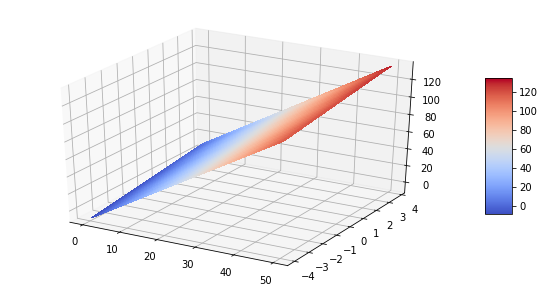

In [4]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(K_t_mesh, z_t_mesh, K_prime_mesh, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Exercise 2

$$\frac{1}{e^{z_t}K_t^{\alpha} - K_{t+1}} =  \beta E_t\{\frac{\alpha e^{z_{t+1}}K_{t+1}^{\alpha-1}}{e^{z_{t+1}}K_{t+1}^{\alpha}*(1-A)}\}$$

In [5]:
K_t2, K_t1, K_t, z_t1, z_t, K, α, β = var('K_{t+2} K_{t+1} K_t z_{t+1} z_t K \\alpha \\beta')

In [6]:
E = β*α*exp(z_t1)*log(K_t1)**(α-1)*(exp(z_t)*(log(K_t)**α)-log(K_t1))/(exp(z_t1)*(log(K_t1)**α)-log(K_t2))

F = diff(E, K_t2)
G = diff(E, K_t1)
H = diff(E, K_t)
L = diff(E, z_t1)
M = diff(E, z_t)

In [7]:

F = F.subs(K_t2, K).subs(K_t1, K).subs(K_t, K).subs(z_t1, 0).subs(z_t, 0).subs(α, 0.85).subs(β, 0.9)
G = G.subs(K_t2, K).subs(K_t1, K).subs(K_t, K).subs(z_t1, 0).subs(z_t, 0).subs(α, 0.85).subs(β, 0.9)
H = H.subs(K_t2, K).subs(K_t1, K).subs(K_t, K).subs(z_t1, 0).subs(z_t, 0).subs(α, 0.85).subs(β, 0.9)
L = L.subs(K_t2, K).subs(K_t1, K).subs(K_t, K).subs(z_t1, 0).subs(z_t, 0).subs(α, 0.85).subs(β, 0.9)
M = M.subs(K_t2, K).subs(K_t1, K).subs(K_t, K).subs(z_t1, 0).subs(z_t, 0).subs(α, 0.85).subs(β, 0.9)
N = 0

In [8]:
α = 0.85
β = 0.9
P_1 = (-G +(G**2 - 4*F*H)**(0.5))/(2*F)
P_2 = (-G -(G**2 - 4*F*H)**(0.5))/(2*F)
P = P_1
Q = -(L*N +M)/(F*N+F*P+G)

K_t, z = var('K_t z')

K_prime = K+P*(K_t -K) + Q*z
K_prime = K_prime.subs(K, (α*β)**(α-1))
K_prime_l = lambdify([K_t, z], K_prime, 'numpy')

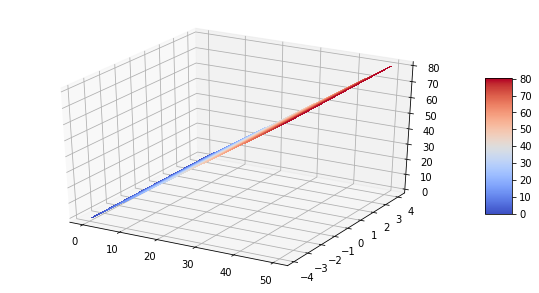

In [9]:
K_t_array = np.linspace(.1, 50, 100)
z_t_array = np.random.uniform (-4, 4, 100)

K_t_mesh, z_t_mesh = np.meshgrid(K_t_array, z_t_array)
K_prime_mesh = K_prime_l(K_t_mesh, z_t_mesh)

fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(K_t_mesh, z_t_mesh, K_prime_mesh, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Exercise 3

We start with:

$$ E_t\{ F \tilde{X_{t+1}} +  G \tilde{X_{t}} + H \tilde{X_{t-1}}  L \tilde{Z_{t+1}} + M\tilde{Z_{t}}\}$$

If we input the following two equations:

$$\tilde{Z}_t = N \tilde{Z}_{t-1} + \epsilon_t$$
$$\tilde{X}_t = P \tilde{X}_{t-1} + Q \tilde{Z}_t$$

 into equation (5), we will get equation (8)

## Exercise 4

In [2]:
def Modeldefs(Xp, X, Y, Z, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns explicitly defined
    values for consumption, gdp, wages, real interest rates, and transfers
    
    Inputs are:
        Xp: value of capital in next period
        X: value of capital this period
        Y: value of labor this period
        Z: value of productivity this period
        params: list of parameter values
    
    Outputs are:
        GDP: GDP
        w: wage rate
        r: rental rate on capital
        T: transfer payments
        c: consumption
        i: investment
        u: utiity
    '''
    
    # unpack input vectors
    kp = Xp
    k = X
    ell = Y
    z = Z
    
    # truncate labor if necessary
    if ell > 0.9999:
        ell = 0.9999
    elif ell < 0.0001:
        ell = 0.0001
    
    # unpack params
    [alpha, beta, gamma, delta, a, xi, rho, sigma, tau] = params
    
    # find definintion values
    GDP = k**alpha*(np.exp(z)*ell)**(1-alpha)
    w = (1-alpha)*GDP/ell
    r = alpha*GDP/k
    T = tau*(w*ell + (r - delta)*k)
    c = (1-tau)*(w*ell + (r - delta)*k) + k + T - kp
    i = GDP - c
    u = (c**(1-gamma)-1)/(1-gamma) - a*((1-ell)**(1-xi)-1)/(1-xi)

    return GDP, w, r, T, c, i, u


def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theat0
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    
    # unpack params
    [alpha, beta, gamma, delta, a, xi, rho, sigma, tau] = params
    
    # find definitions for now and next period
    ell = Y
    if ell > 1:
        ell = 0.9999
    elif ell < 0.0001:
        ell = 0.0001
    GDP, w, r, T, c, i, u = Modeldefs(Xp, X, Y, Z, params)
    GDPp, wp, rp, Tp, cp, ip, up = Modeldefs(Xpp, Xp, Yp, Zp, params)
    
    # Evaluate Euler equations
    E1 = (c**(-gamma)*w*(1-tau)) / (a*(1-ell)**(-xi)) - 1
    E2 = (beta * c**(gamma)*((rp - delta)*(1-tau)+1)) / (cp**(gamma)) - 1
    
    return np.array([E1, E2])

In [3]:
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_SSL import LinApp_SSL

In [4]:
# set parameter values
alpha = .40
beta = .98
gamma = 2.5
delta = .1
a = .5
xi = 1.5
rho = .9
sigma = .1
tau = 0.05

# make parameter list to pass to functions
params = np.array([alpha, beta, gamma, delta, a, xi, rho, sigma, tau])

# set LinApp parameters
Zbar = np.array([0.])
nx = 1  # number of X variables
ny = 1  # number of Y variables
nz = 1  # number of Z variables
logX = 0  # 1 if log-linearizing, otherwise 0
Sylv = 0  # just set this to 0 for now.

In [33]:
# take a guess for steady state values of k and ell
guessXY = np.array([.1, .25])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, ellbar) = XYbar

# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, ellbar, ellbar, 0., 0.])

# check SS solution
check = Modeldyn(theta0, params)
print ('check SS: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

# find the steady state values for the definitions

Ybar, wbar, rbar, Tbar, cbar, ibar, ubar = Modeldefs(kbar, kbar, ellbar, 0.0, params)

# display all steady state values
print ('kbar:   ', kbar)
print ('ellbar: ', ellbar)
print ('Ybar:   ', Ybar)
print ('wbar:   ', wbar)
print ('rbar:   ', rbar)
print ('Tbar:   ', Tbar)
print ('cbar:   ', cbar)
print ('ibar:   ', ibar)
print ('ubar:   ', ubar)

check SS:  [-7.99360578e-15 -1.11022302e-16]
kbar:    4.225229026783882
ellbar:  0.5797914531670072
Ybar:    1.2832261088325905
wbar:    1.3279527683513068
rbar:    0.12148227712137477
Tbar:    0.04303516030771012
cbar:    0.8607032061542021
ibar:    0.4225229026783883
ubar:    0.3744284683594984


## Problem 5

In [36]:
def sensitivity(params, shock=0.1):
    deriv_matrix = []
    ssValues = Modeldefs(kbar, kbar, ellbar, 0.0, params)
    ssValues = np.array(ssValues)
    for i in range(len(params)):
        paramsTemp = list(params)
        paramsTemp[i] += 0.1
        shockValues = Modeldefs(kbar, kbar, ellbar, 0.0, paramsTemp)
        shockValues = np.array(shockValues)
        deriv_matrix.append((shockValues - ssValues)/shock)
    
    return np.array(deriv_matrix)

In [39]:
sensitivity_matrix = sensitivity(params)
np.set_printoptions(precision=2)
print(sensitivity_matrix)

[[ 2.82e+00  2.18e-01  6.37e-01  1.41e-01  2.82e+00  2.22e-15  2.89e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.32e-02]
 [ 0.00e+00  0.00e+00  0.00e+00 -2.11e-01 -4.23e+00  4.23e+00 -1.46e+01]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  1.09e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  2.60e-01]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  8.61e-01  8.88e-15 -8.88e-15  1.33e-14]]


## Problem 6

In [40]:
# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
   LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)

# set value for NN    
NN = rho
    
# find the policy and jump function coefficients
PP, QQ, RR, SS = LinApp_Solve(AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, NN, Zbar, Sylv)
print ('A: ', AA)
print ('B: ', BB)
print ('C: ', CC)
print ('D: ', DD)
print ('F: ', FF)
print ('G: ', GG)
print ('H: ', HH)
print ('J: ', JJ)
print ('K: ', KK)
print ('L: ', LL)
print ('M: ', MM)
print ('-------- o -------')
print ('P: ', PP)
print ('Q: ', QQ)
print ('R: ', RR)
print ('S: ', SS)

A:  [[2.9]]
B:  [[-2.87]]
C:  [[-8.12]]
D:  [[-1.64]]
F:  [[2.9]]
G:  [[-5.89]]
H:  [[2.97]]
J:  [[-3.74]]
K:  [[3.86]]
L:  [[-2.17]]
M:  [[2.24]]
-------- o -------
P:  [[0.92]]
Q:  [[0.55]]
R:  [[-0.03]]
S:  [[-0.01]]


# Problem 7

## Generating one simulation

In [41]:
# generate a history of Z's
T = 250  
zhist = np.zeros((T,1))

epshist = np.random.randn(T,1)*0.0004
# iteratively generate Z's starting with the first value of Z = 0
for t in range (1,T):
    zhist[t,:] = rho*zhist[t-1,:] + epshist[t,:]
# generate a history of k's

kbar2 = np.array([[kbar]])
ellbar2 = np.array([[ellbar]])
XYbar = np.array([[kbar],[ellbar]])
khist, ellhist = LinApp_SSL(kbar2, zhist, XYbar, logX, PP, QQ, RR, SS)

In [42]:
# initialize histories of all other variables
Yhist = np.zeros(T)
whist = np.zeros(T)
rhist = np.zeros(T)
Thist = np.zeros(T)
chist = np.zeros(T)
ihist = np.zeros(T)
uhist = np.zeros(T)
# set initial values noting we started at the steady state
Yhist[0] = Ybar
whist[0] = wbar
rhist[0] = rbar
Thist[0] = wbar
chist[0] = cbar
ihist[0] = ibar
uhist[0] = ubar
# compute values for all other time periods
for t in range(1,T):
    Yhist[t], whist[t], rhist[t], Thist[t], chist[t], ihist[t], uhist[t] = \
    Modeldefs(khist[t], khist[t-1], ellhist[t], zhist[t], params)
                 

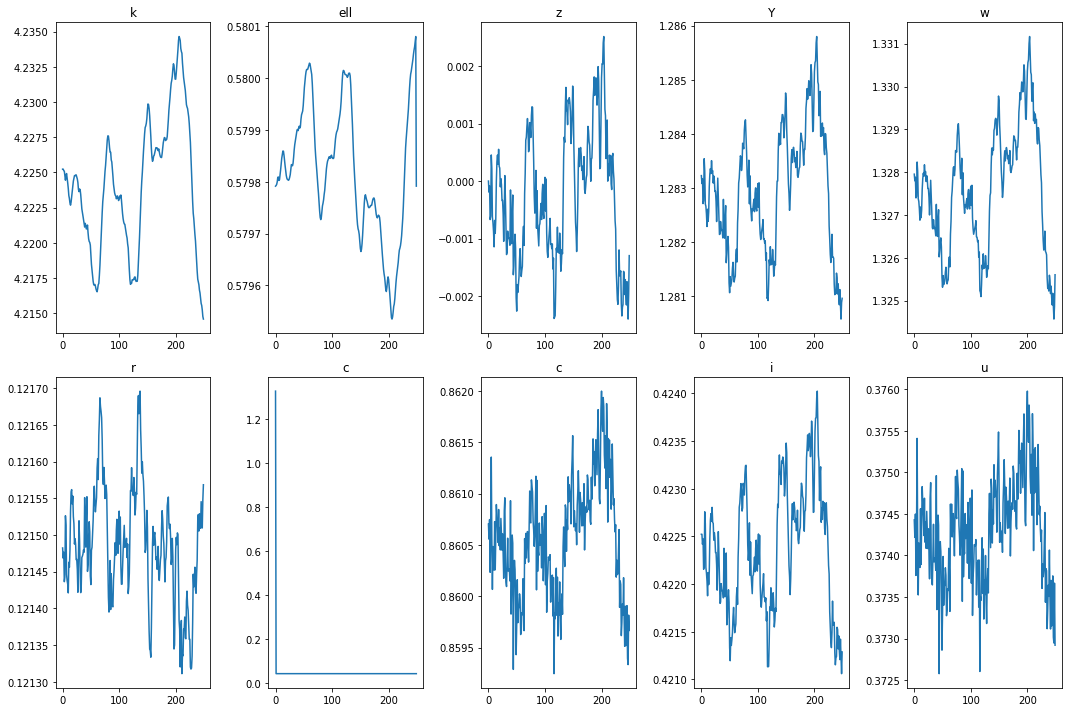

In [43]:
# plot data
time = range(0, T)

fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 5,1)
plt.plot(time, khist, label='k')
plt.title('k')
plt.subplot(2, 5,2)
plt.plot(time, ellhist, label='l')
plt.title('ell')
plt.subplot(2, 5,3)
plt.plot(time, zhist, label='z')
plt.title('z')
plt.subplot(2, 5,4)
plt.plot(time, Yhist, label='Y')
plt.title('Y')
plt.subplot(2, 5,5)
plt.plot(time, whist, label='w')
plt.title('w')
plt.subplot(2, 5,6)
plt.plot(time, rhist, label='r')
plt.title('r')
plt.subplot(2, 5,7)
plt.plot(time, Thist, label='T')
plt.title('c')
plt.subplot(2, 5,8)
plt.plot(time, chist, label='c')
plt.title('c')
plt.subplot(2, 5,9)
plt.plot(time, ihist, label='i')
plt.title('i')
plt.subplot(2, 5,10)
plt.plot(time, uhist, label='u')
plt.title('u')

fig.tight_layout()

plt.show()

## Simulate

In [44]:
def get_sim(T):
    # generate a history of Z's
     
    zhist = np.zeros((T,1))

    epshist = np.random.randn(T,1)*0.0004
    # iteratively generate Z's starting with the first value of Z = 0
    for t in range (1,T):
        zhist[t,:] = rho*zhist[t-1,:] + epshist[t,:]
    # generate a history of k's

    kbar2 = np.array([[kbar]])
    ellbar2 = np.array([[ellbar]])
    XYbar = np.array([[kbar],[ellbar]])
    khist, ellhist = LinApp_SSL(kbar2, zhist, XYbar, logX, PP, QQ, RR, SS)
    
    # initialize histories of all other variables
    Yhist = np.zeros(T)
    whist = np.zeros(T)
    rhist = np.zeros(T)
    Thist = np.zeros(T)
    chist = np.zeros(T)
    ihist = np.zeros(T)
    uhist = np.zeros(T)
    # set initial values noting we started at the steady state
    Yhist[0] = Ybar
    whist[0] = wbar
    rhist[0] = rbar
    Thist[0] = wbar
    chist[0] = cbar
    ihist[0] = ibar
    uhist[0] = ubar
    # compute values for all other time periods
    for t in range(1,T):
        Yhist[t], whist[t], rhist[t], Thist[t], chist[t], ihist[t], uhist[t] = \
        Modeldefs(khist[t], khist[t-1], ellhist[t], zhist[t], params)
    
    return Yhist, whist, rhist, Thist, chist, ihist, uhist

In [ ]:
def n_sim(n, T):
    sim_dict = {'Ysim' :[], 'wsim': [], 'rsim':[], 'Tsim':[], 'csim':[],'isim':[],'usim':[]}
    sim_keys = list(sim_dict.keys())
    for i in range(n):
        curr_sim = get_sim(T)
        for index, key in enumerate(sim_keys):
            sim_dict[key].append(curr_sim[index])
    for index, key in enumerate(sim_keys):
        sim_dict[key] = np.array(sim_dict[key])
    return sim_dict, sim_keys

In [60]:
n = 1000
T = 250
sim_dict, sim_keys = n_sim(n, T)

In [98]:
def get_sim_stats(sim_dict, sim_keys, n):
    sim_stats_dict = dict()
    for index, key in enumerate(sim_keys):
        curr_key = sim_dict[key]
        curr_key.sort(axis=0)
        quant_5 = curr_key[int(5*n/100), :]
        quant_95 = curr_key[int(95*n/100), :]
        mean = curr_key.mean(axis=0)
        curr_diff = curr_key-mean
        volatility = ((curr_diff**2).sum(axis=0)/n)**0.5
        coef_of_var = mean/volatility
        
        ar_1_corr = np.corrcoef(mean[:-1], mean[1:])
        sim_stats_dict[key] = [quant_5, quant_95, mean, volatility, coef_of_var, ar_1_corr]
    return sim_stats_dict

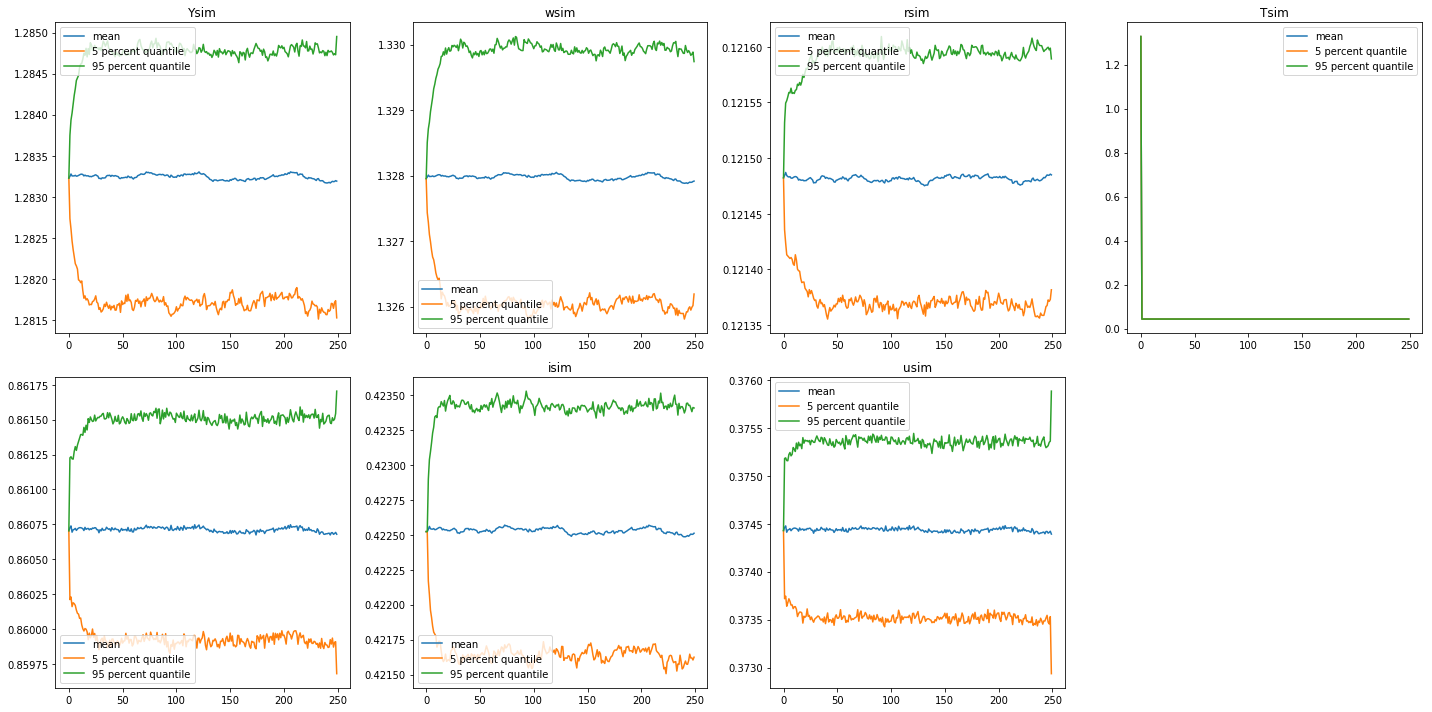

In [99]:
# plot data
time = range(0, T)
sim_stats_dict = get_sim_stats(sim_dict, sim_keys, n)
fig = plt.figure(figsize=(20, 10))
for index, key in enumerate(sim_keys):
    plt.subplot(2, 4, index+1)
    plt.plot(time, sim_stats_dict[key][2], label='mean')
    plt.plot(time, sim_stats_dict[key][0], label='5 percent quantile')
    plt.plot(time, sim_stats_dict[key][1], label='95 percent quantile')
    plt.legend()
    plt.title(key)

fig.tight_layout()

plt.show()

## Problem 8

Mean, volatility (standard deviation), coefficient of variation (mean divided by standard deviation), relative volatility (standard deviation divided bu the standard deviation of output), persistence (autocorrelation), and cyclicality (correlation with output)

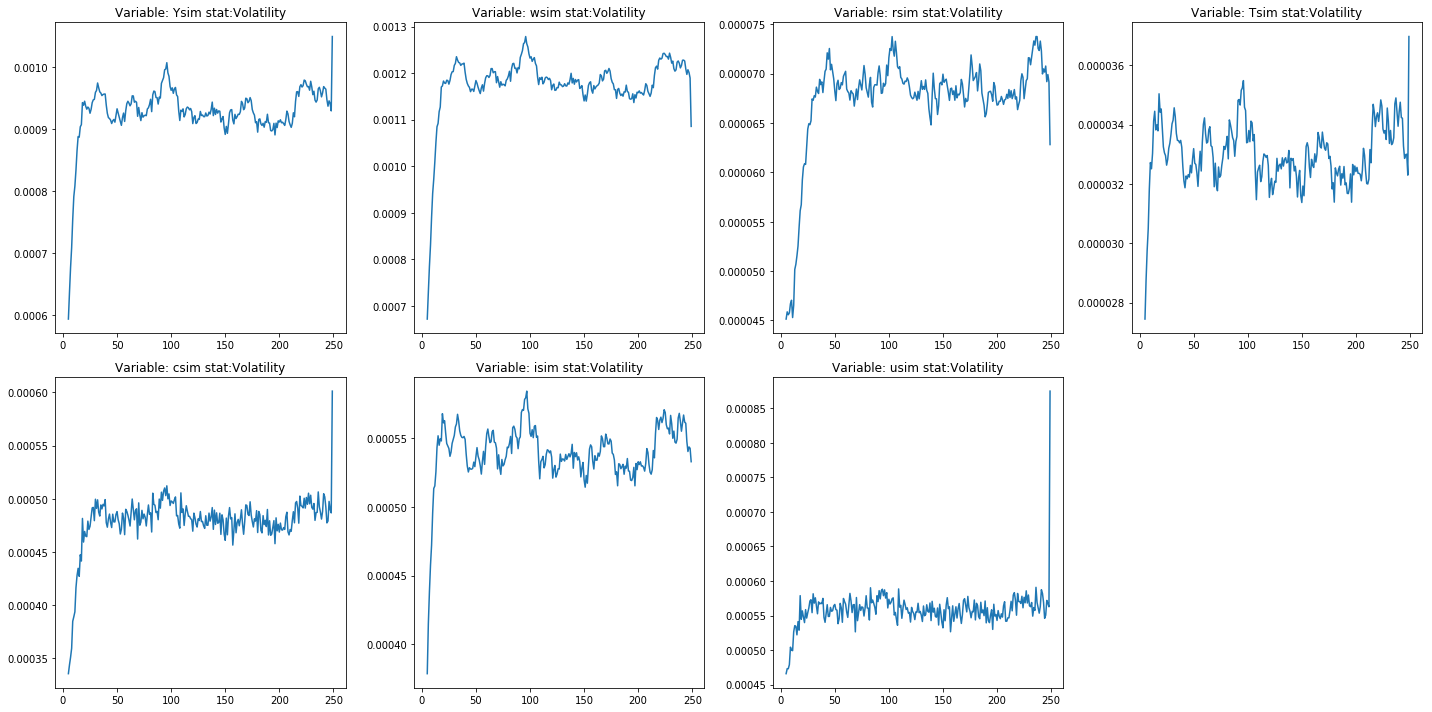

In [100]:
def plot_stat(i, interested_stat, sim_stats_dict, lag=0):
    # plot data
    fig = plt.figure(figsize=(20, 10))
    for index, key in enumerate(sim_keys):
        plt.subplot(2, 4, index+1)
        data = sim_stats_dict[key][i]
        time = range(lag, data.shape[0])
        plt.plot(time, data[lag:])
        plt.title('Variable: '+key+' stat:'+interested_stat)

    fig.tight_layout()
    return fig

fig = plot_stat(3, 'Volatility', sim_stats_dict, lag=5)

plt.show()

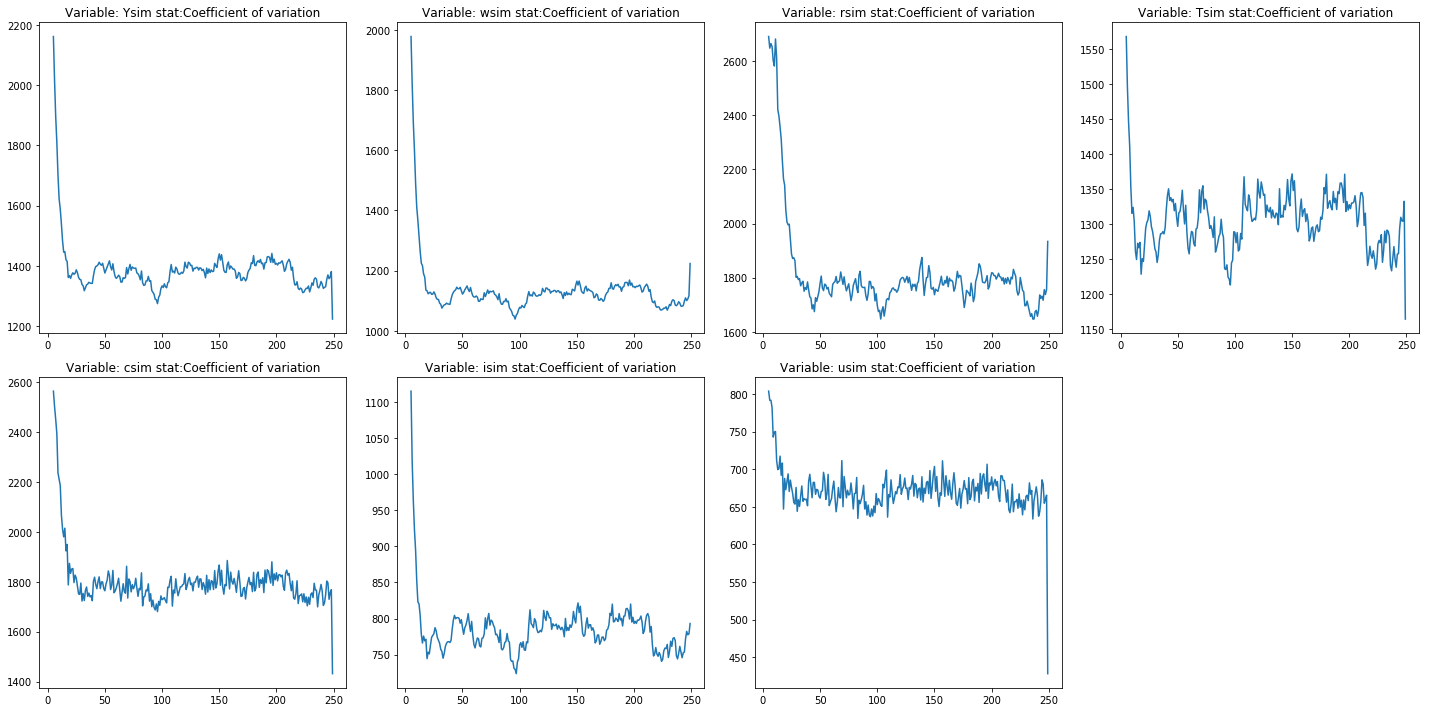

In [101]:
fig = plot_stat(4, 'Coefficient of variation', sim_stats_dict, lag=5)

plt.show()

In [102]:
for index, key in enumerate(sim_keys):
    print(key, 'AR(1) matrix')
    data = sim_stats_dict[key][5]
    print(data)



Ysim AR(1) matrix
[[1.   0.95]
 [0.95 1.  ]]
wsim AR(1) matrix
[[1.   0.97]
 [0.97 1.  ]]
rsim AR(1) matrix
[[1.  0.9]
 [0.9 1. ]]
Tsim AR(1) matrix
[[1.   0.04]
 [0.04 1.  ]]
csim AR(1) matrix
[[1.   0.67]
 [0.67 1.  ]]
isim AR(1) matrix
[[1.   0.93]
 [0.93 1.  ]]
usim AR(1) matrix
[[1.   0.48]
 [0.48 1.  ]]


## Problem 9

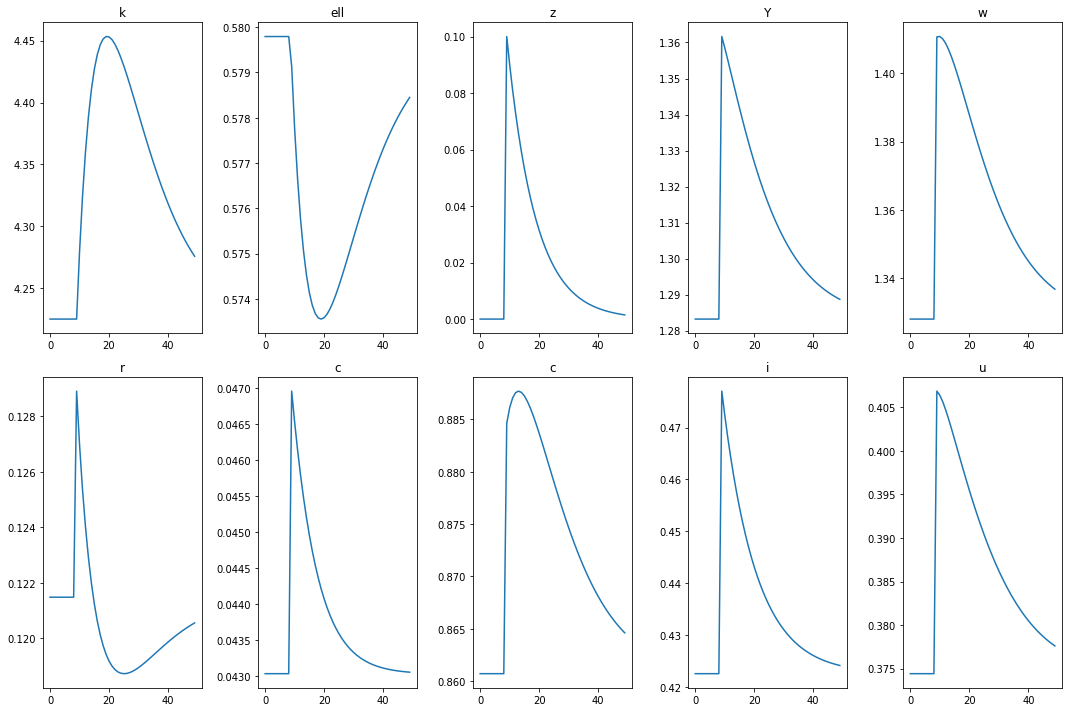

In [103]:
# set number of observations
nobs = 50 

# create a history of z's using equation (7)
zhist = np.zeros(nobs+1)
#epshist = sigma*np.random.normal(0., 1., nobs+1)
epshist = np.zeros(nobs+1)
epshist[9] = sigma
zhist[0] = epshist[0]
for t in range(1,nobs+1):
    zhist[t] = rho*zhist[t-1] + epshist[t]
    
# LinApp_SSL requires that Zhist be a 2-dimensional array
Zhist = np.reshape(zhist, (nobs+1, 1))

# Linapp_SSL also requires that starting values be arrays
k0 = np.array([[kbar]])
ell0 = np.array([[ellbar]])

# create a history of k's and ell's using LinApp_SSL
khist, ellhist =  LinApp_SSL(k0, Zhist ,XYbar, logX, PP, QQ, RR, SS)

# create histories of remaining variables
Yhist = np.zeros(nobs)
whist = np.zeros(nobs)
rhist = np.zeros(nobs)
Thist = np.zeros(nobs)
chist = np.zeros(nobs)
ihist = np.zeros(nobs)
uhist = np.zeros(nobs)
for t in range(0,nobs):
    Yhist[t], whist[t], rhist[t], Thist[t], chist[t], ihist[t], uhist[t] = \
        Modeldefs(khist[t+1], khist[t], ellhist[t], zhist[t], params)
        
# delete last observation
khist = khist[0:nobs]
zhist = zhist[0:nobs]
ellhist = ellhist[0:nobs]

# plot time series
time = range(0, nobs)

fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 5,1)
plt.plot(time, khist, label='k')
plt.title('k')
plt.subplot(2, 5,2)
plt.plot(time, ellhist, label='l')
plt.title('ell')
plt.subplot(2, 5,3)
plt.plot(time, zhist, label='z')
plt.title('z')
plt.subplot(2, 5,4)
plt.plot(time, Yhist, label='Y')
plt.title('Y')
plt.subplot(2, 5,5)
plt.plot(time, whist, label='w')
plt.title('w')
plt.subplot(2, 5,6)
plt.plot(time, rhist, label='r')
plt.title('r')
plt.subplot(2, 5,7)
plt.plot(time, Thist, label='T')
plt.title('c')
plt.subplot(2, 5,8)
plt.plot(time, chist, label='c')
plt.title('c')
plt.subplot(2, 5,9)
plt.plot(time, ihist, label='i')
plt.title('i')
plt.subplot(2, 5,10)
plt.plot(time, uhist, label='u')
plt.title('u')

fig.tight_layout()

plt.show()